
# Análisis de Sentimientos con Machine Learning: Comparación entre Naive Bayes y Regresión Logística



### Diccionario de Datos
Aquí se describe cada columna del dataset:

- **rating**: Tipo de dato: int64. Significado: Calificación del producto (1 a 5).
- **date**: Tipo de dato: object. Significado: Fecha de la reseña.
- **variation**: Tipo de dato: object. Significado: Variación del producto (color, tamaño, etc.).
- **verified_reviews**: Tipo de dato: object. Significado: Texto de la reseña verificada.
- **feedback**: Tipo de dato: int64, Valores posibles: 0, 1. Significado: Indicador de feedback positivo (1) o negativo (0).

## 1.Importar librerias y dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
reviews_df = pd.read_csv("https://raw.githubusercontent.com/AndreLir/MyDatasets/refs/heads/main/DataAmazonAlexa.tsv", sep = "\t")

In [ ]:
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
reviews_df['verified_reviews']

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
...,...
3145,"Perfect for kids, adults and everyone in betwe..."
3146,"Listening to music, searching locations, check..."
3147,"I do love these things, i have them running my..."
3148,Only complaint I have is that the sound qualit...


## 2.Análisis Exploratorio de Datos (EDA)
En esta sección, realizaremos un análisis inicial para comprender la estructura de los datos, identificar patrones, valores atípicos y visualizar relaciones entre las variables.


<Axes: >

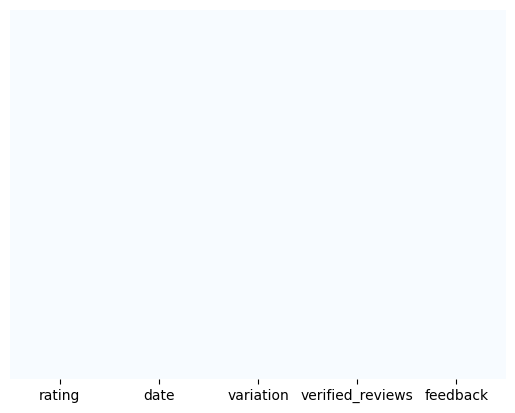

In [ ]:
sns.heatmap(reviews_df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

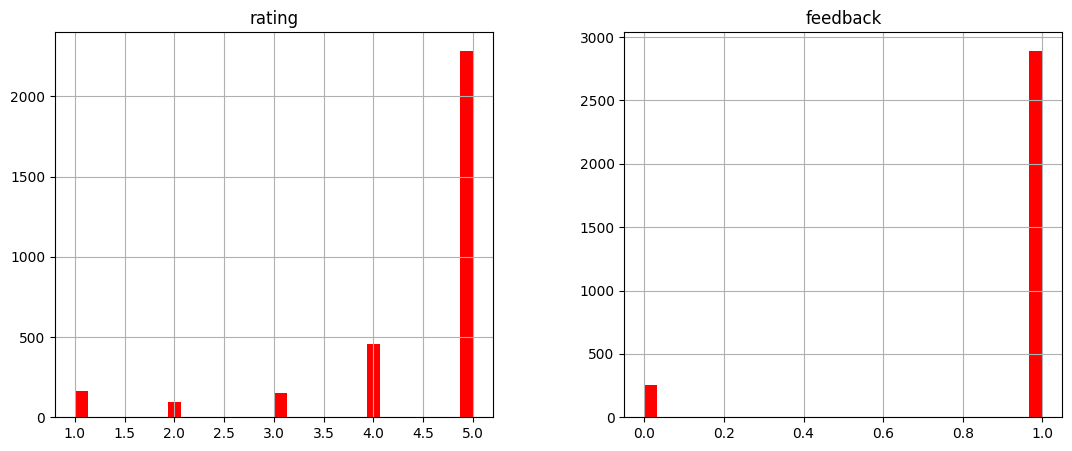

In [ ]:
reviews_df.hist(bins = 30, figsize = (13, 5), color = 'r')

In [ ]:
reviews_df['length'] = reviews_df['verified_reviews'].astype(str).apply(len)
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<Axes: ylabel='Frequency'>

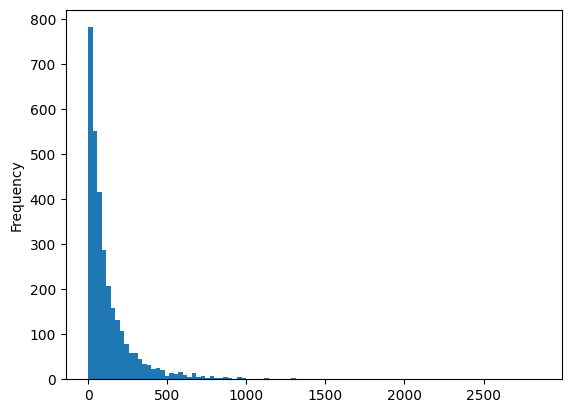

In [ ]:
reviews_df['length'].plot(bins = 100, kind = 'hist')

In [ ]:
reviews_df.length.describe()

,length
count,3150.000000
mean,132.049206
std,182.100176
min,1.000000
25%,30.000000
50%,74.000000
75%,165.000000
max,2851.000000


In [ ]:
reviews_df[reviews_df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [ ]:
reviews_df[reviews_df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [ ]:
reviews_df[reviews_df['length'] == 133]['verified_reviews'].iloc[0]

'Fun item to play with and get used to using.  Sometimes has hard time answering the questions you ask, but I think it will be better.'

In [ ]:
positive = reviews_df[reviews_df['feedback'] == 1]

In [ ]:
negative = reviews_df[reviews_df['feedback'] == 0]

In [ ]:
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [ ]:
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


<Axes: xlabel='rating', ylabel='count'>

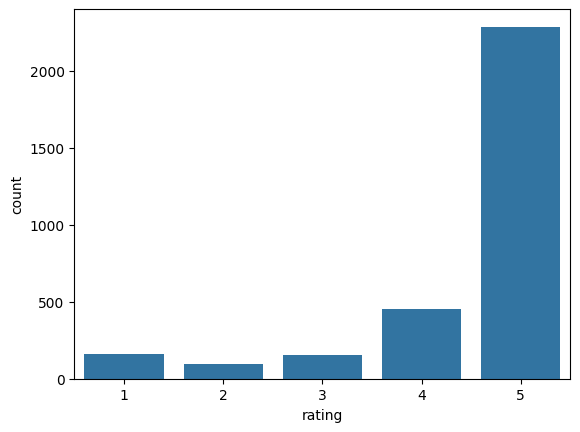

In [ ]:
sns.countplot(x = 'rating', data = reviews_df)

<Axes: >

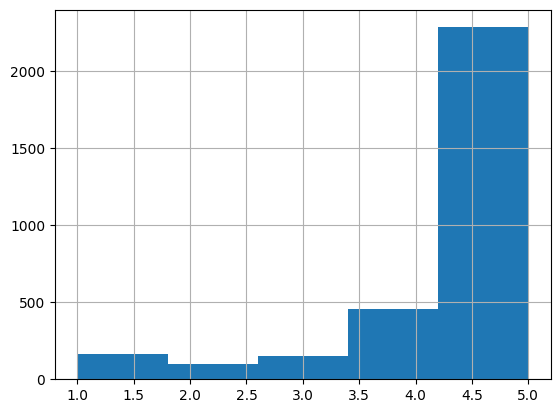

In [ ]:
reviews_df['rating'].hist(bins = 5)

/tmp/ipython-input-2447011572.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'variation', y = 'rating', data = reviews_df, palette='deep')


<Axes: xlabel='variation', ylabel='rating'>

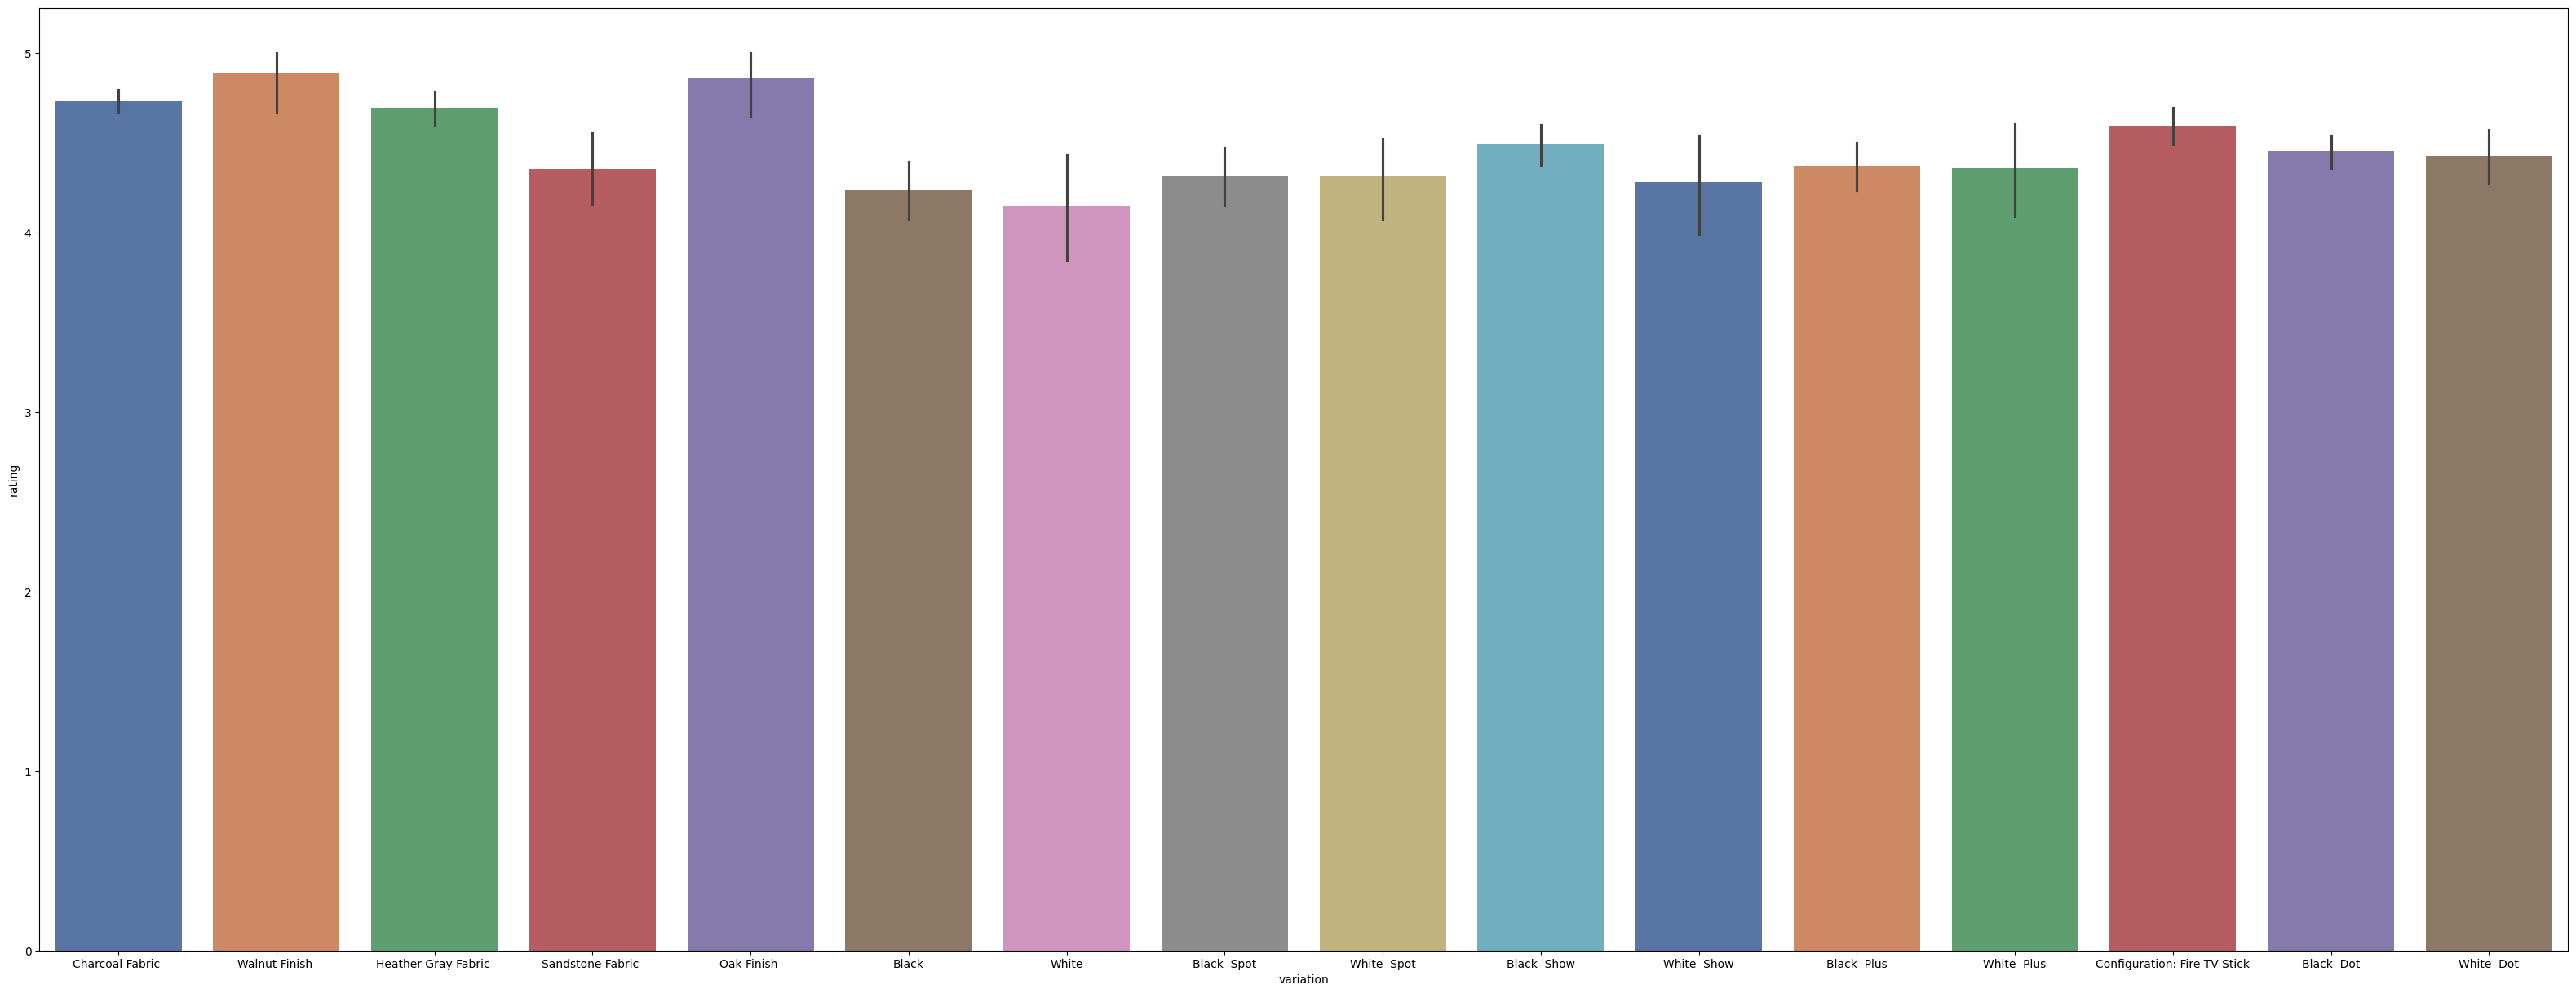

In [ ]:
plt.figure(figsize=(40, 15))
sns.barplot(x = 'variation', y = 'rating', data = reviews_df, palette='deep')

In [ ]:
sentences = reviews_df['verified_reviews'].tolist()
len(sentences)

3150

In [ ]:
print(sentences)

['Love my Echo!', 'Loved it!', 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.', 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.', 'Music', 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.', 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.', "I think this is the 5th one I've purcha

In [ ]:
sentences_as_one_string = " ".join([str(sentence) for sentence in sentences])

In [ ]:
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

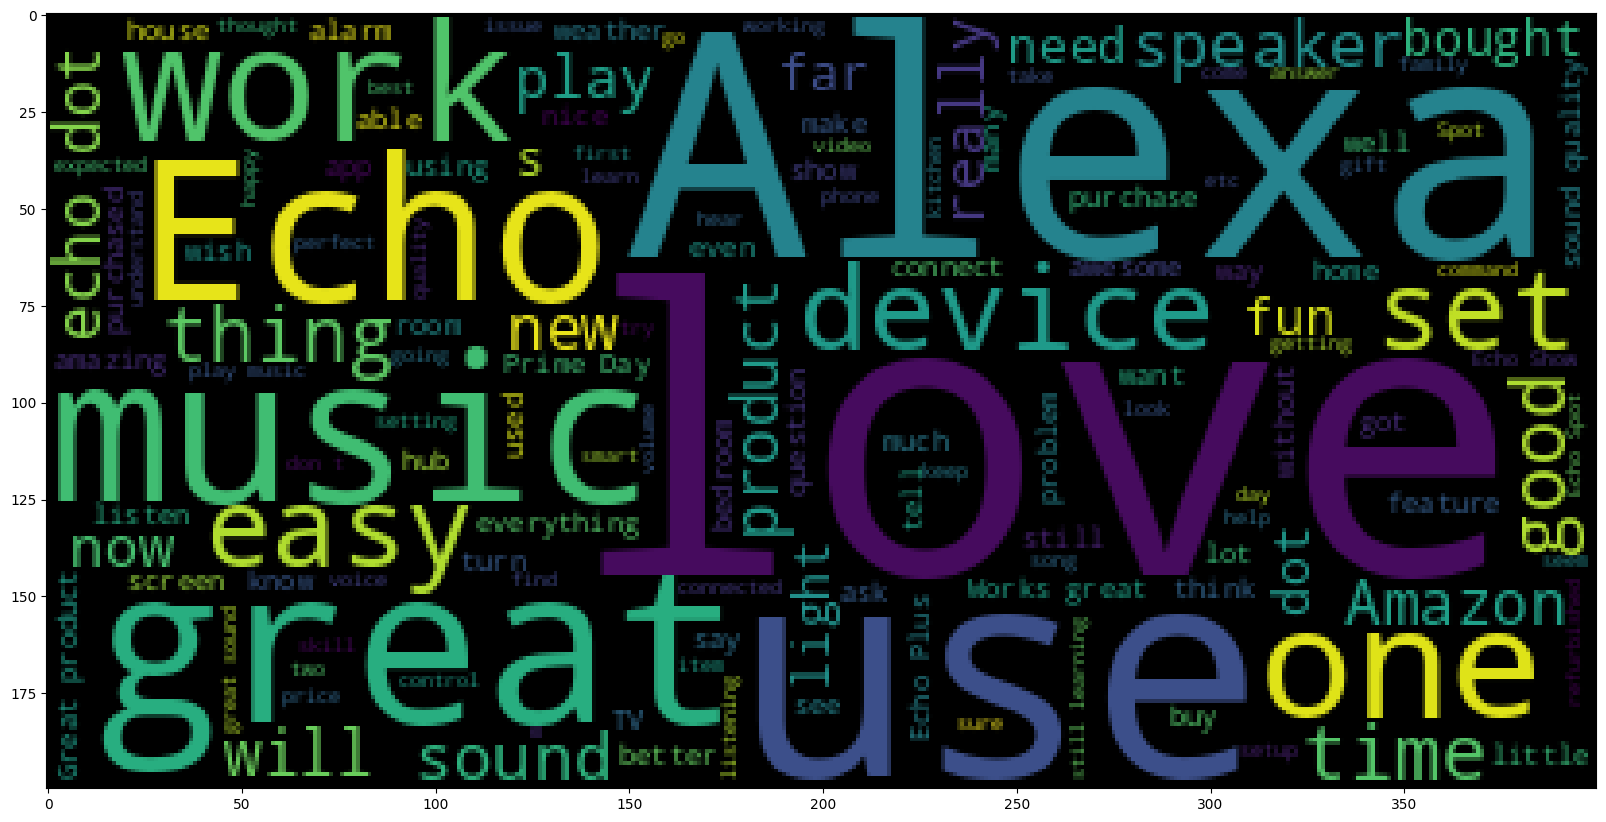

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [ ]:
negative_list = negative['verified_reviews'].tolist()
negative_list

["It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals.",
 'Sound is terrible if u want good music too get a bose',
 'Not much features.',
 "Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?",
 'Sad joke. Worthless.',
 'Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.',
 "It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things",
 "I am not super impressed with Alexa. When my Prime lapsed, she wouldn't play anything. She isn't smart enough to differentiate among spotify accounts so we can't use it f

In [ ]:
negative_sentences_as_one_string = " ".join([str(sentence) for sentence in negative_list])

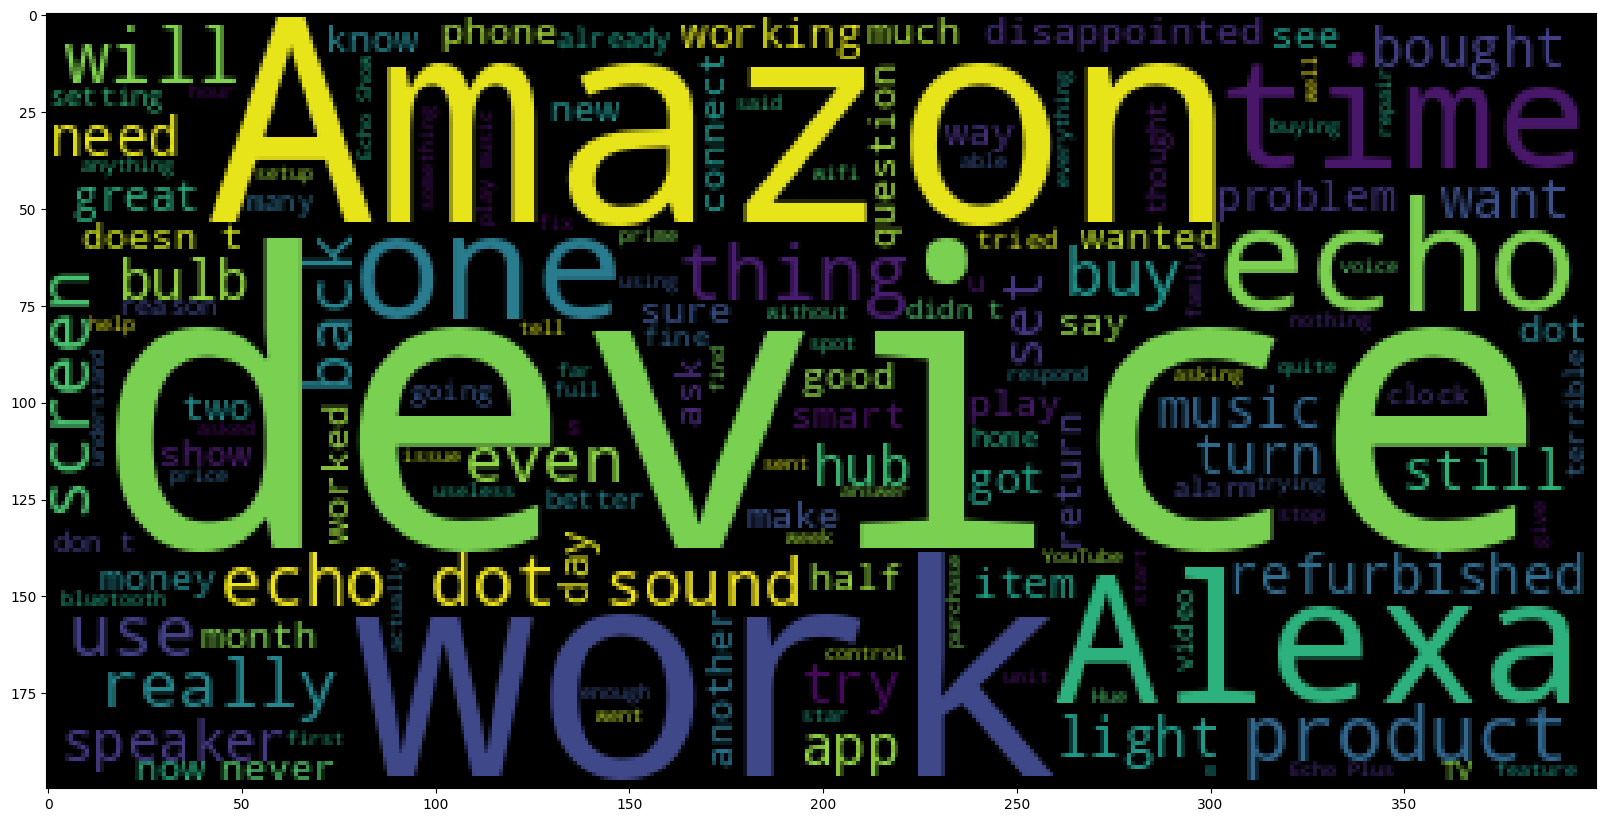

In [ ]:
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

## 3.Preprocesamiento de Datos
Modificaremos y prepararemos la data para que pueda utilizarce en los modelos de Machine learnign posteriores

In [ ]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [ ]:
reviews_df = reviews_df.drop(['date', 'rating', 'length'], axis = 1)

In [ ]:
reviews_df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first=True)

In [ ]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3146,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3147,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3148,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
reviews_df.drop(['variation'], axis = 1, inplace = True)

In [ ]:
reviews_df = pd.concat([reviews_df, variation_dummies],axis = 1)

In [ ]:
reviews_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,Loved it!,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,"Sometimes while playing a game, you can answer...",1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,I have had a lot of fun with this thing. My 4 ...,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,Music,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3146,"Listening to music, searching locations, check...",1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3147,"I do love these things, i have them running my...",1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3148,Only complaint I have is that the sound qualit...,1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


### 3.1.ELIMINAR LOS SÍGNOS DE PUNTUACIÓN DEL TEXTO

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

### 3.2.LIMPIEZA DE DATOS

In [ ]:
# Definimos un pipeline para limpiar todos los mensajes
# El pipeline realizamos lo siguiente: (1) eliminar signos de putuación, (2) eliminar las stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean


In [ ]:
reviews_df['verified_reviews'] = reviews_df['verified_reviews'].astype(str)
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)


In [ ]:
print(reviews_df_clean[3])

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [ ]:
print(reviews_df['verified_reviews'][3])

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.


In [ ]:
reviews_df_clean

,verified_reviews
0,"[Love, Echo]"
1,[Loved]
2,"[Sometimes, playing, game, answer, question, c..."
3,"[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,[Music]
...,...
3145,"[Perfect, kids, adults, everyone]"
3146,"[Listening, music, searching, locations, check..."
3147,"[love, things, running, entire, home, TV, ligh..."
3148,"[complaint, sound, quality, isnt, great, mostl..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer=message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [ ]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [ ]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
reviews_countvectorizer.shape

(3150, 5212)

In [ ]:
reviews_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,Loved it!,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,"Sometimes while playing a game, you can answer...",1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,I have had a lot of fun with this thing. My 4 ...,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,Music,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3146,"Listening to music, searching locations, check...",1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3147,"I do love these things, i have them running my...",1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3148,Only complaint I have is that the sound qualit...,1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
reviews_df.drop(['verified_reviews'], axis = 1, inplace = True)

In [ ]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [ ]:
reviews_df = pd.concat([reviews_df, reviews], axis = 1)

In [ ]:
reviews_df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5202,5203,5204,5205,5206,5207,5208,5209,5210,5211
0,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,1,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3146,1,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3147,1,True,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3148,1,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = reviews_df.drop(['feedback'], axis = 1)
X

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,...,5202,5203,5204,5205,5206,5207,5208,5209,5210,5211
0,False,False,False,False,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,False,False,False,False,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,False,False,False,False,False,False,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
3,False,False,False,False,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,False,False,False,False,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3146,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3147,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3148,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = reviews_df['feedback']
y

,feedback
0,1
1,1
2,1
3,1
4,1
...,...
3145,1
3146,1
3147,1
3148,1


## 4.Entrenamiento del modelo Naive Bayes
Entrenamos el modelo

In [ ]:
X.shape

(3150, 5227)

In [ ]:
y.shape

(3150,)

In [ ]:
from sklearn.model_selection import train_test_split
X.columns = X.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_multinomial = MultinomialNB()
nb_multinomial.fit(X_train, y_train)

MultinomialNB()

## 5.Evaluación del Modelo
Evaluaremos el rendimiento del modelo entrenado utilizando, tecnicas para definir métricas apropiadas, asi determinar cuál son más efectivo para predecir la deserción.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

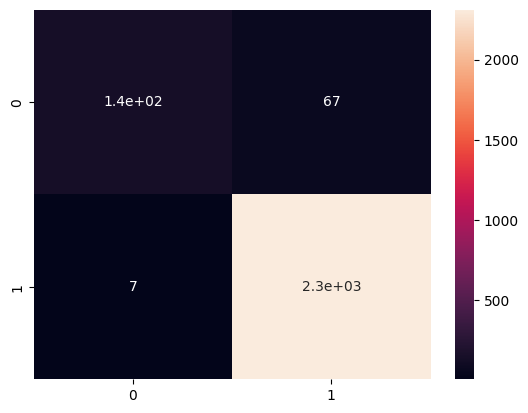

In [ ]:
y_predict_train  = nb_multinomial.predict(X_train)
y_predict_train

cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<Axes: >

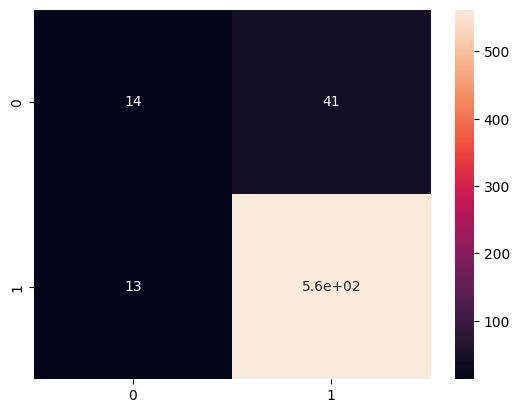

In [ ]:
y_predict_test = nb_multinomial.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)


In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.52      0.25      0.34        55
           1       0.93      0.98      0.95       575

    accuracy                           0.91       630
   macro avg       0.73      0.62      0.65       630
weighted avg       0.90      0.91      0.90       630



## 6.Entrenamiento del modelo Regresion logistica
Entrenamos el modelo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## 7.Evaluación del Modelo
Evaluaremos el rendimiento del modelo entrenado utilizando, tecnicas para definir métricas apropiadas, asi determinar cuál son más efectivo para predecir la deserción.

In [ ]:
print("Accuracy {} %".format(100*accuracy_score(y_test, y_pred)))

Accuracy 92.22222222222223 %


<Axes: >

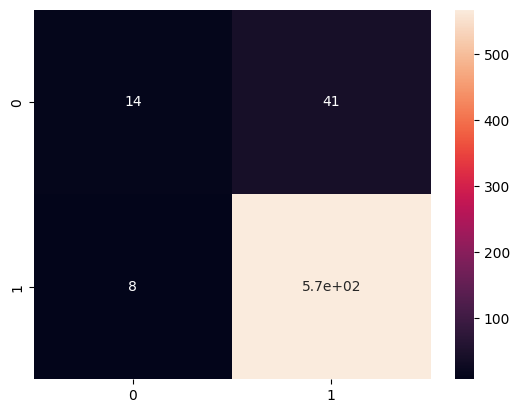

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.25      0.36        55
           1       0.93      0.99      0.96       575

    accuracy                           0.92       630
   macro avg       0.78      0.62      0.66       630
weighted avg       0.91      0.92      0.91       630



### 🔎 **Análisis de Resultados**

1. **Clase 0 (minoritaria, 55 casos)**

   * Ambos modelos tienen **mal desempeño** en esta clase.
   * **Naive Bayes**: precision = 0.52, recall = 0.25 → f1 = 0.34
   * **Regresión Logística**: precision = 0.64, recall = 0.25 → f1 = 0.36
     👉 Ambos capturan muy pocos verdaderos positivos de la clase 0, con un recall bastante bajo (solo 25%). La Regresión Logística mejora un poco la precisión, pero no logra aumentar el recall.

2. **Clase 1 (mayoritaria, 575 casos)**

   * Ambos modelos tienen un **excelente desempeño**.
   * **Naive Bayes**: f1 = 0.95
   * **Regresión Logística**: f1 = 0.96
     👉 La Regresión Logística obtiene un ligero mejor resultado aquí.

3. **Métricas globales**

   * **Naive Bayes**: accuracy = 0.91, macro F1 = 0.65
   * **Regresión Logística**: accuracy = 0.92, macro F1 = 0.66
     👉 Aunque la accuracy es alta en ambos (>90%), está influenciada por el **desequilibrio de clases**. El macro F1 muestra que los modelos no son tan buenos con la clase 0.

---

### ✅ **Conclusión**

Tanto Naive Bayes como Regresión Logística obtienen un desempeño muy alto en la clase mayoritaria (1), pero fallan en detectar correctamente la clase minoritaria (0). Esto indica un **problema de desbalance de clases** que limita la utilidad práctica de los modelos si la clase 0 es importante para el negocio.

* **La Regresión Logística es ligeramente superior** en términos de precisión global y f1-score, aunque la diferencia es marginal.
* Si el objetivo es maximizar la detección de la clase minoritaria, se recomienda aplicar técnicas como:

  * **Rebalanceo de datos** (oversampling de la clase 0 con SMOTE o undersampling de la clase 1).
  * **Ajuste de umbral de decisión** en la regresión logística.
  * **Uso de métricas como ROC-AUC o PR-AUC**, más adecuadas en datasets desbalanceados.

